In [73]:
cd CSV\ files

[Errno 2] No such file or directory: 'CSV files'
/Users/aratliff/Documents/Flatiron/Phase_1/Microsoft_Movie_Project/CSV files


In [74]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import json
from datetime import datetime

# Data Cleaning

We are using datasets from IMDB, The Numbers and The Movie DB. The data sets we pulled were cleaned and combined in the below lines of code

In [75]:
df = pd.read_csv("combined_movie_data.csv")

In [76]:
df['movie_year'] = df.release_date_x.str[:4]
df.head()

,Unnamed: 0,titleId,start_year,genres,ordering,title,region,genre_ids,id_x,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,movie_year
0,0,tt0069049,2018.0,Drama,3.0,The Other Side of the Wind,US,"[35, 18]",299782,9.800,2018-11-02,7.0,64,NaN,NaN,NaN,NaN,NaN,2018
1,1,tt0112502,2017.0,"Horror,Thriller",3.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
2,2,tt4503112,2018.0,"Action,Horror",3.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
3,3,tt9181914,2018.0,"Animation,Family",5.0,Bigfoot,US,"[27, 878, 12]",117856,2.813,2012-06-30,2.9,26,NaN,NaN,NaN,NaN,NaN,2012
4,4,tt0192528,2018.0,Drama,1.0,Heaven & Hell,US,[18],567662,0.600,2018-11-06,7.5,2,NaN,NaN,NaN,NaN,NaN,2018


In [77]:
df.drop(df.loc[df['domestic_gross']=='$0'].index, inplace=True)

In [78]:
df1 = df.drop(['Unnamed: 0', 'start_year','titleId','worldwide_gross','genre_ids', 'id_x', 'worldwide_gross','id_y','ordering'], axis=1, inplace=False)

In [79]:
df2 = df1.dropna(axis = 0, subset = ['production_budget', 'domestic_gross'], inplace = False)
df2

,genres,title,region,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,movie_year
22,no genre,The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015","$200,000","$1,109,808",2015
23,"Comedy,Mystery",The Overnight,US,6.576,2015-06-19,6.0,200,"Jun 19, 2015","$200,000","$1,109,808",2015
26,"Adventure,Drama,Romance",On the Road,US,8.919,2012-12-21,5.6,518,"Mar 22, 2013","$25,000,000","$720,828",2012
27,Horror,Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014","$3,300,000","$13,092,006",2013
28,"Drama,Music",Whiplash,US,6.298,2013-01-18,7.9,94,"Oct 10, 2014","$3,300,000","$13,092,006",2013
...,...,...,...,...,...,...,...,...,...,...,...
26098,no genre,Man on Fire,NaN,1.790,2018-01-24,8.0,1,"Apr 23, 2004","$60,000,000","$77,906,816",2018
26200,no genre,Spawn,NaN,1.400,2018-04-13,10.0,1,"Jul 31, 1997","$40,000,000","$54,979,992",2018
26317,no genre,Enough,NaN,0.719,2018-03-22,8.7,3,"May 24, 2002","$38,000,000","$39,177,215",2018
26457,no genre,Undiscovered,NaN,0.600,2018-04-07,8.0,1,"Aug 26, 2005","$9,000,000","$1,069,318",2018


In [80]:
df2['domestic_gross'] = df2['domestic_gross'].str.replace('$', '')
df2['domestic_gross'] = df2['domestic_gross'].str.replace(',', '')

df2['production_budget'] = df2['production_budget'].str.replace('$', '')
df2['production_budget'] = df2['production_budget'].str.replace(',', '')

df2['domestic_gross'] = pd.to_numeric(df2['domestic_gross'],errors='coerce')
df2['production_budget'] = pd.to_numeric(df2['production_budget'],errors='coerce')


df2["net"] = df2['domestic_gross'] - df2['production_budget'] 

df2.drop(df2.loc[df2['genres']=='no genre'].index, inplace=True)

df2['ROI'] = (df2['net']/df2['domestic_gross'])*100

df2['ROI'].apply(np.ceil)

final_df = df2.drop_duplicates(subset=['title'])

final_df.drop(['release_date_x','movie_year'], axis=1, inplace=True)

final_df['release_date'] = final_df.release_date_y.apply(lambda x: pd.to_datetime(x).strftime('%m%d%Y'))

final_df['release_date'] = pd.to_datetime(final_df['release_date'], format='%m%d%Y')

final_df['month'] = pd.DatetimeIndex(final_df['release_date']).month

conditions = [
    (final_df['month'] == 12)| (final_df['month'] == 1)| (final_df['month'] == 2),
    (final_df['month'] == 3) | (final_df['month'] == 4)| (final_df['month'] == 5),
    (final_df['month'] == 6) | (final_df['month'] == 7)| (final_df['month'] == 8),
    (final_df['month'] == 9) | (final_df['month'] == 10)| (final_df['month'] == 11)
    ]
# create a list of the values we want to assign for each condition
values = ['winter', 'spring', 'summer', 'fall']
# create a new column and use np.select to assign values to it using our lists as arguments
final_df['season'] = np.select(conditions, values)
# display updated DataFrame
final_df.tail()

final_df = final_df.drop(['release_date_y'], axis=1, inplace=False)

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

# Visualizing our Data

With our data clean, we can now begin to develop visuals that will help us see trends. To get a general overview of our data and develop a heatmap that tells us which variables have relationships and the strength those relationships. 

Text(0.5, 1, 'Correlation Heatmap')

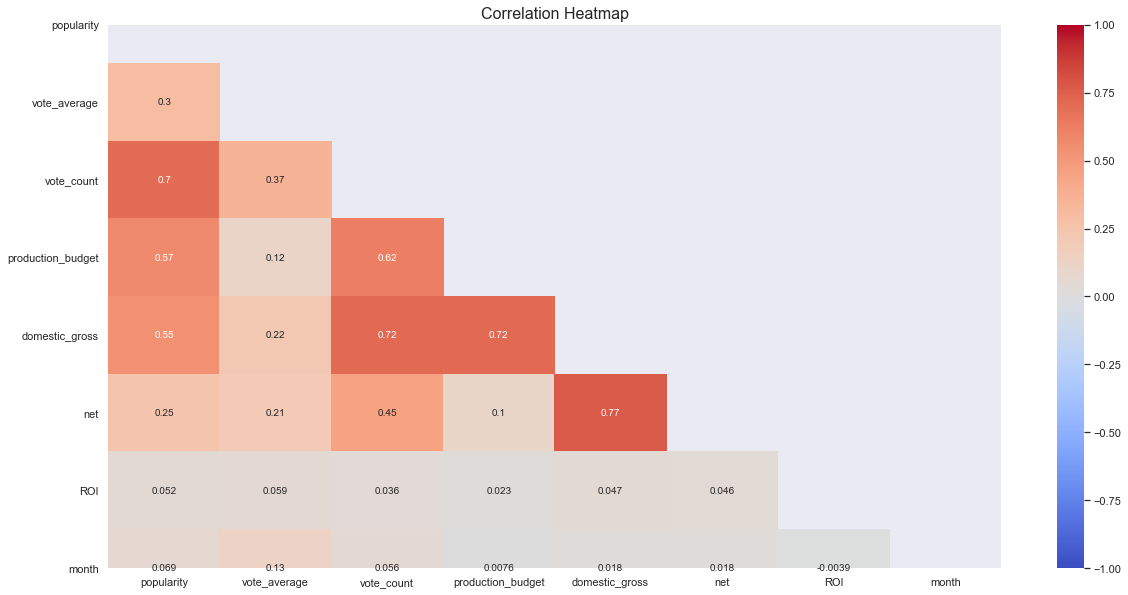

In [67]:
plt.figure(figsize=(20, 10))
matrix = np.triu(final_df.corr())
sn.heatmap(final_df.corr(), annot = True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Correlation Heatmap', fontsize=16)

This map has our quantitative data. On the right hand side there is a meter ranging from -1(Blue) to 1(Red). The closer to 1 the numbers are, the stronger the relationship of the two variables. Conversely, the closer to -1 they are, the less likely there will be a relationship. For instance if we look at the variables of domestic_gross and net we see a strong correlation of .77. We know that this is a positive relationship because of its proximity to 1. As the domestic_gross goes up, so does the net variable. For our analysis we will be looking at the relationship between production budget and domestic gross, movie releases per season and finally which season has the highest domestic gross sales. Through our analysis will be able to provide recommendations.
        

# Production Budget and Domestic Gross

Let's explore the relationship between Production Budget and Domestic Gross. One of the major factors of expanding a business is to understand how much profit there is to gain. We also need to know how much capital to invest in a project to receive a worthwhile return. Looking at both our production budget and the gross domestic revenue we can get a picture of how the two are related.  

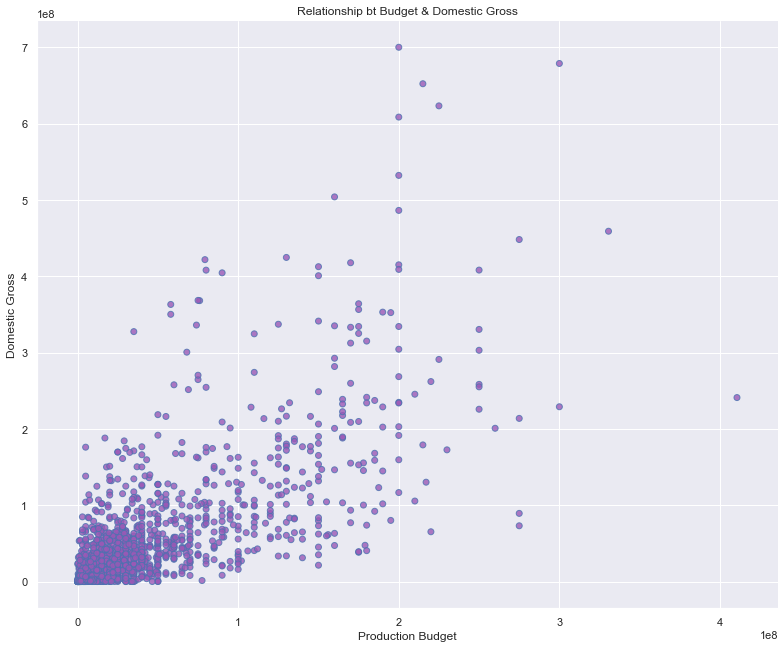

In [68]:
value=(final_df['production_budget']> 0) & (final_df['domestic_gross']>0)
final_df['color'] = np.where( value==True , "#9b59b6", "#3498db")

g = sn.lmplot('production_budget','domestic_gross', 
              data = final_df, 
              fit_reg= False, 
              scatter_kws={'facecolors':final_df['color']},)


fig = plt.gcf()
fig.set_size_inches( 12, 10)
# g.set(xscale="log")
sn.set_style("whitegrid")
g.set_axis_labels("Production Budget", "Domestic Gross")
# set(xlim=(0,50), ylim=(0,100))
plt.title("Relationship bt Budget & Domestic Gross")
plt.show(g)

The scatterplot above consists of the points in our data. The first observation that sticks out is the positive correlation between the two variables. As production budget increases so does the domestic gross. Wanting to understand how much we should invest, can be easily done by finding the median or the middle point of distribution. We do not want to take the average because of a few outliers that we see in the graphs that can skew our data. We know that by taking the median, we will have an even distribution on either side and this would be a good place to determine the budget size. 

In [69]:
final_df['production_budget'].median()

25000000.0

The median budget is $25 million, this means that half of the movies in our dataset had budgets larger than $25 million and half of the movies in our dataset had budgets smaller than $25 million. Having a budget around this median would allow Microsoft to make modest gains as they test out what works and what does not. 

# Seasons

Anecdotely we know that the release date of a movie can determine its success. We graphed the amount of movies released per season. 

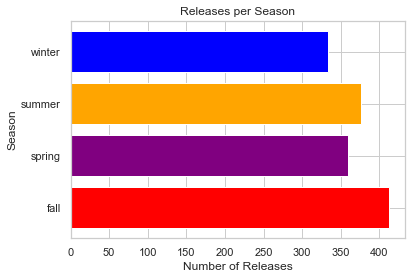

In [70]:
seasons = list(final_df.season.unique())
num_per_season = final_df.groupby('season')['title'].count()

height = (num_per_season)
bars = (['fall', 'spring', 'summer', 'winter'])
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height,color=['red', 'purple', 'orange', 'blue'])
fig.set_size_inches(10, 10) 

# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.xlabel("Number of Releases")
plt.ylabel("Season")
plt.title("Releases per Season")

# Show graphic
plt.show()


The bar chart shows the number of movies released during a season. The most movies are released during the fall followed by the summer then spring and finally winter. Through this we see when the market is saturated and when there is more competition. 

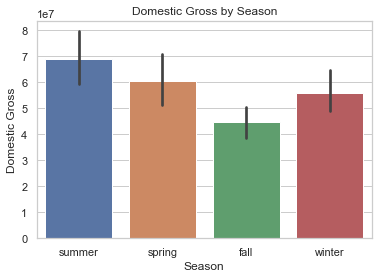

In [71]:
sn.barplot(x = 'season',
            y = 'domestic_gross',
            data = final_df,
            
            )
# Show the plot
sn.set(rc={'figure.figsize':(12,12)})
plt.xlabel("Season")
plt.ylabel("Domestic Gross")
plt.title("Domestic Gross by Season")
plt.show()

There is a different story as we look at domestic gross revenue and group that by season. The most money is made during the summer then the spring, followed by the winter and finally the fall. When releasing content, Microsoft should be mindful of both the saturation of the market and the potential of making increased revenue. 

# Recommendations

Through our analysis, we've come up with three recommendations

Recommendation 1: When investing in content, it is important for Microsoft to consider budget. There is a correlation between the amount invested and the gross revenue. Microsoft should start off with budgets around $25 million per film and adjust accordingly.

Recommendation 2: Avoid releasing high value content during the fall, the market is more saturated during that time and the gross revenue isn't as high as the summer and spring months. 

Recommendation 3: Invest in additional research in genres, actors, and directors. These are additional variables that can be helpful in determining the type of content to make and who to include in that content creation. 